In [12]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
from typing import List, Dict, Any
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


# Q3

In [29]:
file_obstacle = "data/obstacles-cs285-v0_obstacles_multi_l2_h250_mpcrandom_horizon10_actionseq1000_05-11-2023_21-04-28"
file_reacher = "data/reacher-cs285-v0_reacher_multi_l2_h250_mpcrandom_horizon10_actionseq1000_05-11-2023_21-05-03"
file_cheetah = "data/cheetah-cs285-v0_cheetah_multi_l2_h250_mpcrandom_horizon15_actionseq1000_05-11-2023_22-20-03"

obstacle_name = "Obstacles"
reacher_name = "Reacher"
cheetah_name = "HalfCheetah"

In [39]:
def viz(file, debug=False):
    event_acc = EventAccumulator(file)
    event_acc.Reload()
    
    if debug:
        print(event_acc.Tags())
        
    value = [scalar.value for scalar in event_acc.Scalars('eval_return')]
    step = [scalar.step for scalar in event_acc.Scalars('eval_return')]
    
    return value, step 

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['total_envsteps', 'dynamics_loss', 'eval_return', 'eval_ep_len', 'eval/return_std', 'eval/return_max', 'eval/return_min', 'eval/ep_len_std', 'eval/ep_len_max', 'eval/ep_len_min'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
[-420.1957092285156, -285.20361328125, -283.4490966796875, -266.1202697753906, -276.8421325683594, -265.03192138671875, -273.1829528808594, -261.7417297363281, -269.840087890625, -263.14825439453125, -262.28558349609375, -272.611328125, -261.8248291015625, -269.3623962402344, -266.928955078125]


Text(0.5, 1.0, 'Eval Return of MBRL on Reacher')

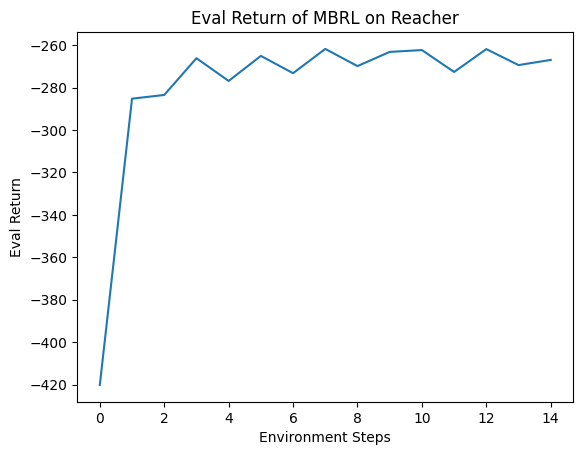

In [31]:
values, steps = viz(file_reacher, debug=True)
plt.plot(steps, values)
plt.xlabel("Environment Steps")
plt.ylabel("Eval Return")
plt.title("Eval Return of MBRL on Reacher")

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['total_envsteps', 'dynamics_loss', 'eval_return', 'eval_ep_len', 'eval/return_std', 'eval/return_max', 'eval/return_min', 'eval/ep_len_std', 'eval/ep_len_max', 'eval/ep_len_min'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
[-40.24010467529297, -28.787403106689453, -39.815059661865234, -29.29812240600586, -29.819976806640625, -29.07204818725586, -44.7201042175293, -37.693397521972656, -29.438701629638672, -26.083255767822266, -40.441463470458984, -34.40704345703125]


Text(0.5, 1.0, 'Eval Return of MBRL on Obstacles')

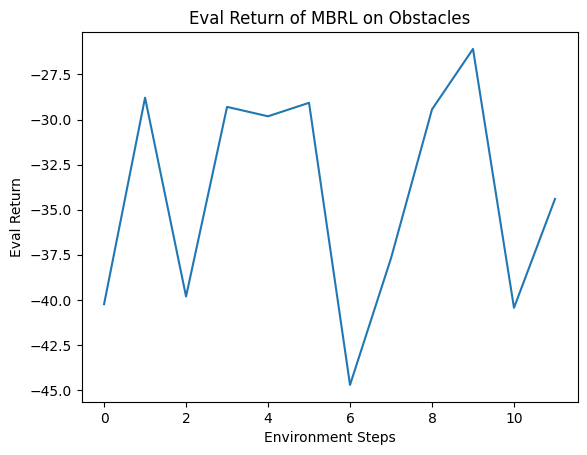

In [33]:
values, steps = viz(file_obstacle, debug=True)
plt.plot(steps, values)
plt.xlabel("Environment Steps")
plt.ylabel("Eval Return")
plt.title("Eval Return of MBRL on Obstacles")

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['total_envsteps', 'dynamics_loss', 'eval_return', 'eval_ep_len', 'eval/return_std', 'eval/return_max', 'eval/return_min', 'eval/ep_len_std', 'eval/ep_len_max', 'eval/ep_len_min'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


Text(0.5, 1.0, 'Eval Return of MBRL on HalfCheetah')

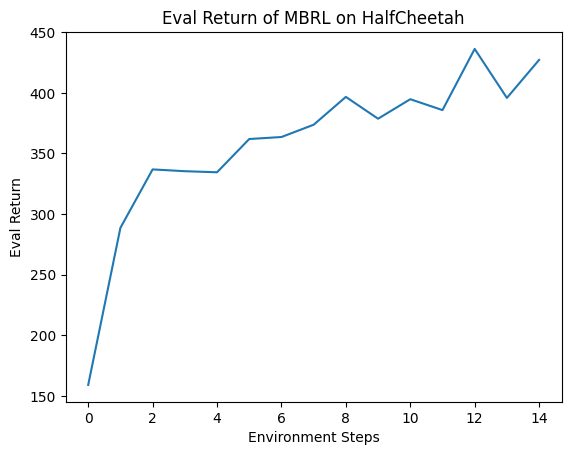

In [50]:
values, steps = viz(file_cheetah, debug=True)
plt.plot(steps, values)
plt.xlabel("Environment Steps")
plt.ylabel("Eval Return")
plt.title("Eval Return of MBRL on HalfCheetah")

# Q4

In [51]:
default = "data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq1000_05-11-2023_22-41-57"
acseq500 = "data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq500_05-11-2023_22-42-08"
acseq2000 = "data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq2000_05-11-2023_22-42-40"
horizon5 = "data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon5_actionseq1000_05-11-2023_22-43-17"
horizon15 = "data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon15_actionseq1000_05-11-2023_22-43-40"
modelplus1 = "data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq1000_05-12-2023_03-00-40"
modelminus1 = "data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq1000_05-11-2023_03-00-59"

names = {}
names["default"] = "Default"
names["acseq500"] = "Num of Action Seq = 500"
names["acseq2000"] = "Num of Action Seq = 2000"
names["horizon5"] = "Horizon = 5"
names["horizon15"] = "Horizon = 15"
names["modelplus1"] = "Ensemble Models = 4"
names["modelminus1"] = "Ensemble Models = 2"

In [52]:
values = {}
steps = {}

values["default"], steps["default"] = viz(default)
values["acseq500"], steps["acseq500"] = viz(acseq500)
values["acseq2000"], steps["acseq2000"] = viz(acseq2000)
values["horizon5"], steps["horizon5"] = viz(horizon5)
values["horizon15"], steps["horizon15"] = viz(horizon15)
values["modelplus1"], steps["modelplus1"] = viz(modelplus1)
values["modelminus1"], steps["modelminus1"] = viz(modelminus1)

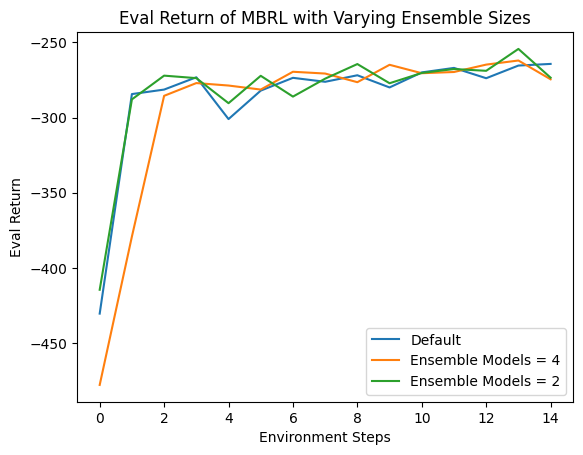

In [53]:
plt.plot(steps["default"], values["default"], label=names["default"])
plt.plot(steps["modelplus1"], values["modelplus1"], label=names["modelplus1"])
plt.plot(steps["modelminus1"], values["modelminus1"], label=names["modelminus1"])
plt.xlabel("Environment Steps")
plt.ylabel("Eval Return")
plt.title("Eval Return of MBRL with Varying Ensemble Sizes")
plt.legend()

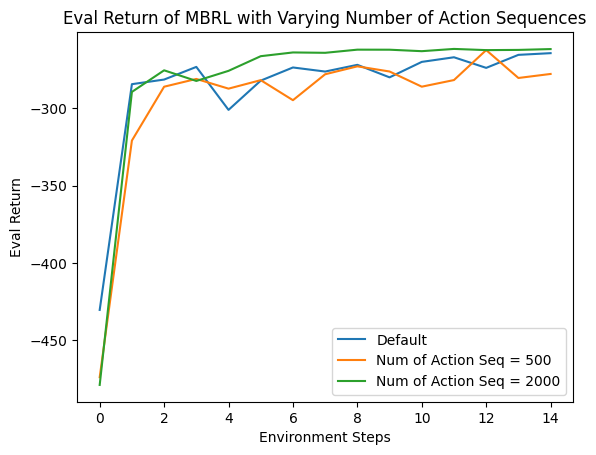

In [56]:
plt.plot(steps["default"], values["default"], label=names["default"])
plt.plot(steps["acseq500"], values["acseq500"], label=names["acseq500"])
plt.plot(steps["acseq2000"], values["acseq2000"], label=names["acseq2000"])
plt.xlabel("Environment Steps")
plt.ylabel("Eval Return")
plt.title("Eval Return of MBRL with Varying Number of Action Sequences")
plt.legend()

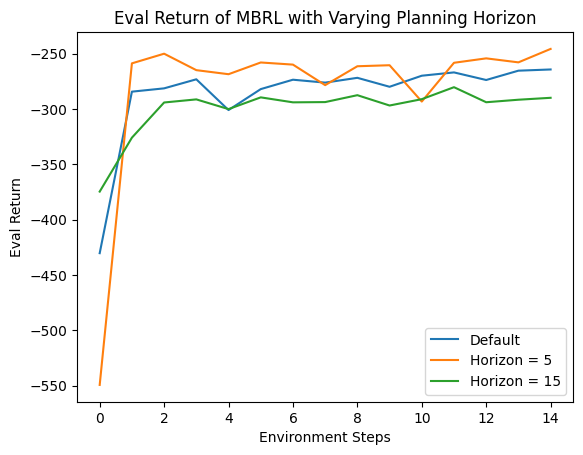

In [55]:
plt.plot(steps["default"], values["default"], label=names["default"])
plt.plot(steps["horizon5"], values["horizon5"], label=names["horizon5"])
plt.plot(steps["horizon15"], values["horizon15"], label=names["horizon15"])
plt.xlabel("Environment Steps")
plt.ylabel("Eval Return")
plt.title("Eval Return of MBRL with Varying Planning Horizon")
plt.legend()

# Q5

In [46]:
random = "data/cheetah-cs285-v0_cheetah_multi_l2_h250_mpcrandom_horizon15_actionseq1000_05-11-2023_22-20-03"
cem_iters2 = "data/cheetah-cs285-v0_cheetah_cem_l2_h250_mpccem_horizon15_actionseq1000_cem_iters2_05-11-2023_23-13-17"
cem_iters4 = "data/cheetah-cs285-v0_cheetah_cem_l2_h250_mpccem_horizon15_actionseq1000_cem_iters4_05-11-2023_23-13-42"

random_name = "Random Shooting"
cem_iters2_name = "Num CEM Iters = 2"
cem_iters4_name = "Num CEM Iters = 4"

In [48]:
random_values, random_steps = viz(random)
cem_iters2_values, cem_iters2_steps = viz(cem_iters2)
cem_iters4_values, cem_iters4_steps = viz(cem_iters4)

KeyError: 'Key eval_return was not found in Reservoir'

In [ ]:
plt.plot(random_steps, random_values, label=random_name)
plt.plot(cem_iters2_values, cem_iters2_steps, label=cem_iters2_name)
plt.plot(cem_iters4_values, cem_iters4_steps, label=cem_iters4_name)
plt.xlabel("Environment Steps")
plt.ylabel("Eval Return")
plt.title("Eval Return of MBRL with CEM vs. Random Shooting")